In [2]:
# This makes plots appear in the notebook
%matplotlib inline 

import math
import cv2
import numpy as np
import matplotlib.pyplot as plt

import siamxt   

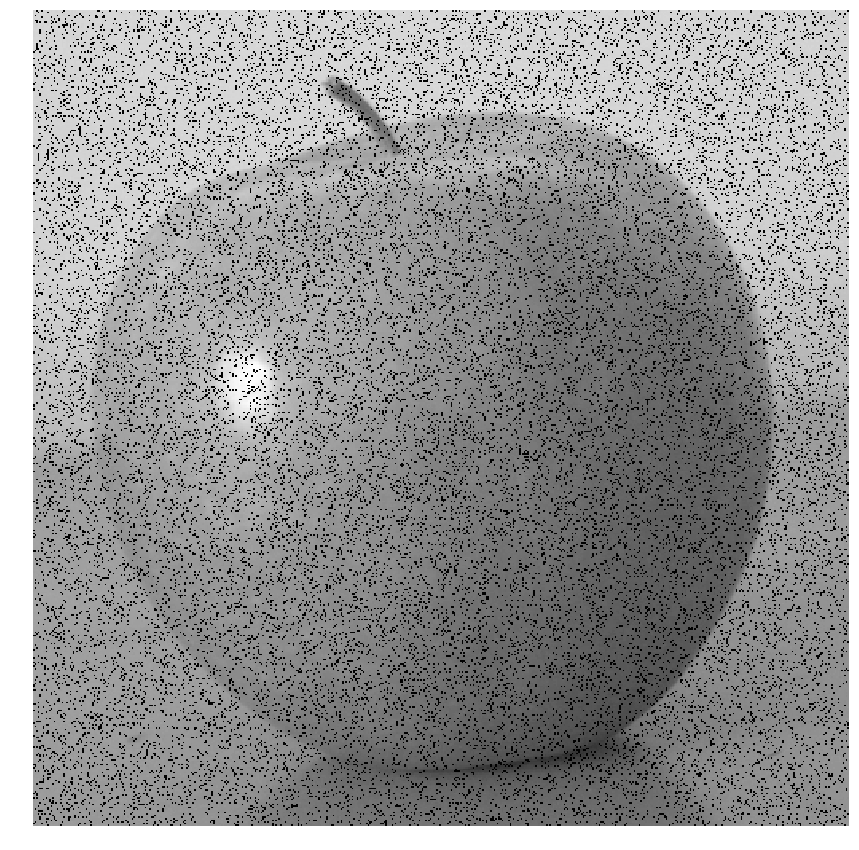

In [48]:
original_img = cv2.imread('../EP2/fruit.png', cv2.IMREAD_GRAYSCALE)
original_img = original_img.astype(np.uint16)

fig, imgs = plt.subplots(1,1, figsize=(15,15))
imgs.imshow(original_img, cmap='gray')
plt.axis('off')
plt.show()


# Area opening example

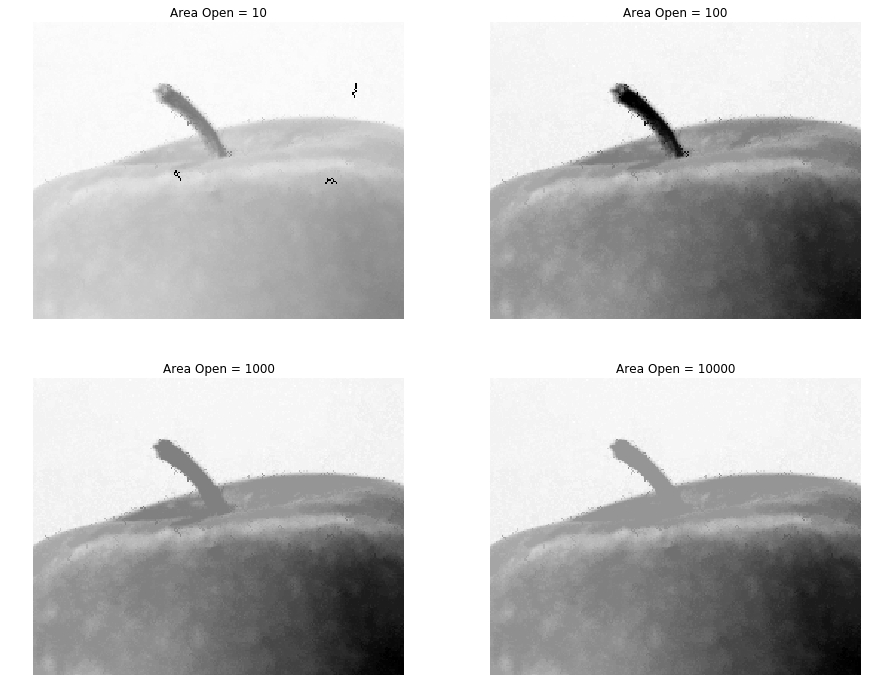

In [50]:
#Structuring element with connectivity-8
neighborhood = np.ones((3,3),dtype = bool)

# Negating the image
img_max = original_img.max()
img_neg = img_max - original_img

areas = [10,100,1000,10000]

filtered_images = []

for area in areas:
    #Building the max-tree of the negated image, i.e. min-tree
    mxt_neg = siamxt.MaxTreeAlpha(img_neg, neighborhood)
   
    #Applying an area-open filter
    mxt_neg.areaOpen(area)

    #Recovering the image 
    img_filtered =  mxt_neg.getImage()
    
    # Negating the image back
    img_filtered = img_max - img_filtered

    filtered_images.append(img_filtered)
    
#Displaying the filtered image
fig, imgs = plt.subplots(2,2, figsize=(15,12))
plt.axis('off')
for i in range(len(filtered_images)):
    imgs[i/2,i%2].imshow(filtered_images[i][0:200,100:350], cmap='gray')
    imgs[i/2,i%2].axis('off')
    imgs[i/2,i%2].set_title('Area Open = '+ str(areas[i]))

plt.show()


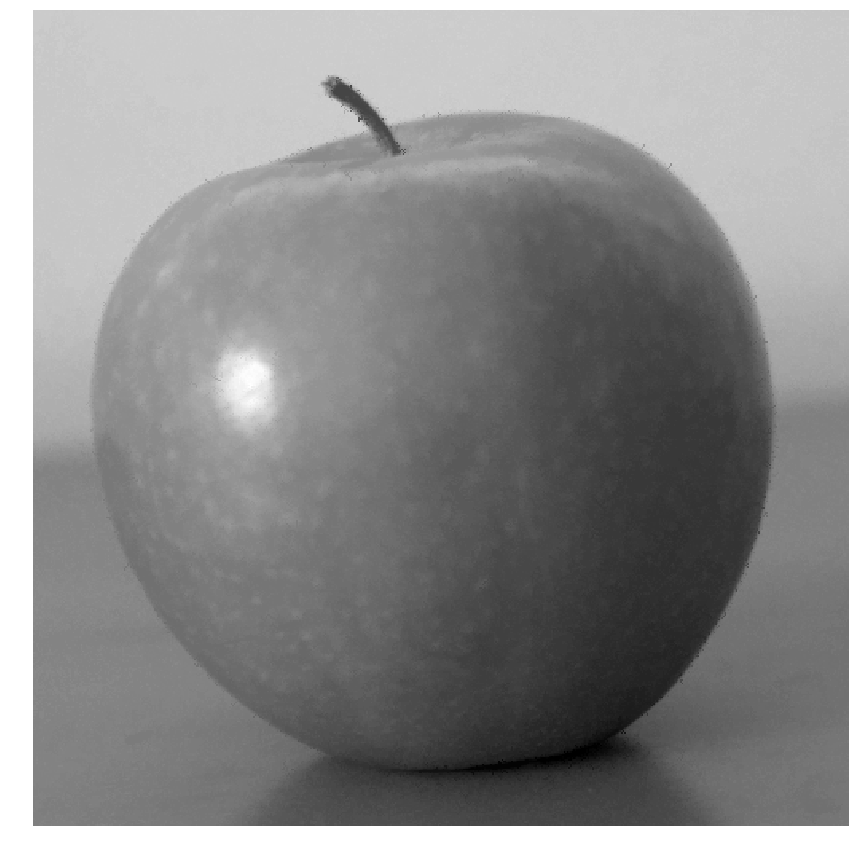

In [46]:
area = 100

#Building the max-tree of the negated image, i.e. min-tree
mxt_neg = siamxt.MaxTreeAlpha(img_neg, neighborhood)

#Applying an area-open filter
mxt_neg.areaOpen(area)

#Recovering the image 
img_filtered =  mxt_neg.getImage()

# Negating the image back
img_filtered = img_max - img_filtered

#Displaying the filtered image
fig, imgs = plt.subplots(1,1, figsize=(15,15))
plt.axis('off')
imgs.imshow(img_filtered, cmap='gray')

plt.show()